In [ ]:
#### 예제
#### 코로나 바이러스의 영향으로 중국인 관광객이 얼마나 줄었을까? 
### 자료 : 외국인 출입국 통계 데이터 구하기
### -> 한국관광공사에서 방한 "외래 관광객과 국민 해외관광객의 통계자료"를 매월 발표 


In [ ]:
import matplotlib.pyplot as plt      
from matplotlib import rc       
import platform  ## 플랫폼 관련 라이브러리, 각각의 플랫폼에 따른 폰트 설정을 위해서

# if platform.system()== "Windows":
#   path = "c:windows/Fonts/malgun.ttf"
#   font_name = font_manager.FontProperties(fname=path).get_name()
#   rc.('font',family=font_name)
# elif platform.system() == "Darwin":
#   rc('font',family='AppleGothic')
# else:
#   print("Check your OS System") 


## 맥북용 
%matplotlib inline         
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
import pandas as pd

kto_201901 = pd.read_excel("data/kto_201901.xlsx",
                            header=1,
                            skipfooter=4,
                            usecols='A:G'
)
kto_201901.head() 
######################
## 데이터 프레임에 대한 정보
kto_201901.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [5]:
kto_201901.describe() # 통계치 정보


,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [6]:
# 필터링 - 최솟값이 0인 경우 확인
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) | \
            (kto_201901['공용'] == 0) | \
            (kto_201901['유학/연수'] == 0)

kto_201901[condition] 

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [8]:
## 통합시 각 자료를 구분하기 위해서 "기준년월" 값을 추가

kto_201901['기준년월'] = "2019-01"
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [9]:
# 국적 데이터 추리기 
kto_201901['국적'].unique() ## unique() : 컬럼 내에 중복을 제거한 값들을 보여주는 함수



array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [80]:
 continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소개','교포']
 continent_list 

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소개', '교포']

In [83]:
## continent_list에 포함되지 않은 국가만 선택
condition = (kto_201901.국적.isin(continent_list)==False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique() 

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포소계'], dtype=object)

In [84]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
1,일본,198805,2233,127,785,4576,206526,2019-01,일본
2,대만,86393,74,22,180,1285,87954,2019-01,대만
3,홍콩,34653,59,2,90,1092,35896,2019-01,홍콩
4,마카오,2506,2,0,17,45,2570,2019-01,마카오
5,태국,34004,37,199,96,6998,41334,2019-01,태국


In [85]:
# ### 인덱스 재정렬
kto_201901_country_newline = kto_201901_country.reset_index(drop=True)
kto_201901_country_newline.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,일본
1,대만,86393,74,22,180,1285,87954,2019-01,대만
2,홍콩,34653,59,2,90,1092,35896,2019-01,홍콩
3,마카오,2506,2,0,17,45,2570,2019-01,마카오
4,태국,34004,37,199,96,6998,41334,2019-01,태국


In [86]:
# 각 국가별 대륙을 지정, 대륙이라는 시리즈 생성하여 추가
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 +['아프리카']*2 + ['기타대륙'] + ['교포']
kto_201901_country_newline['대륙'] = continents
kto_201901_country_newline.head()



,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [56]:
### 관광객 비율(%) 컬럼 생성
kto_201901_country_newline['관광객비율(%)']= \
round(kto_201901_country_newline['관광']/kto_201901_country_newline['계']* 100,1)
kto_201901_country_newline.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [65]:
### 관광객비율(%) 컬럼으로 내림차순으로 정렬
kto_201901_country_newline.sort_values(by='관광객비율(%)',ascending=False) 


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4
19,이스라엘,727,12,0,9,57,805,2019-01,아시아,90.3
53,오스트레일리아,12795,93,17,34,1346,14285,2019-01,오세아니아,89.6
23,GCC,1550,37,14,72,103,1776,2019-01,아시아,87.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
34,스웨덴,844,29,6,18,85,982,2019-01,유럽,85.9


In [66]:
### 대륙별 관광객 비율의 평균
kto_201901_country_newline.pivot_table(values="관광객비율(%)",
                                       index='대륙',
                                       aggfunc="mean")


,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [67]:
### 중국 국적 필터링 
condition = (kto_201901_country_newline['국적'] == '중국')
kto_201901_country_newline[condition]


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [68]:
### 기준년월별로 전체 외국인 관광객 대비 국적별 관광객 비율 확인

tourist_sum = sum(kto_201901_country_newline['관광']) 
tourist_sum

884293

In [70]:
### 전체비율(%)컬럼 생성
kto_201901_country_newline['전체비율(%)'] = round(\
  kto_201901_country_newline['관광']/ tourist_sum * 100,1)
kto_201901_country_newline.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0,0.9
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7,0.1


In [72]:
### 전체비율(%) 상위 5개국
kto_201901_country_newline.sort_values('전체비율(%)',ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [89]:
##### 함수 만들기     
## 인자 - 년,월
## 함수 내부 : 1. 파일읽기(파이썬) 2. 기준년월 컬럼 추가 3. 국적데이터만 남기기 4. 대륙컬럼 추가
##          5. 국가별 관광객비율 컬럼 추가 6. 전체비율 컬럼추가

def create_kto_data(yy,mm):
  file_path = f"data/kto_{yy}{mm}.xlsx"

  df = pd.read_excel(file_path,header=1,skipfooter=4,usecols="A:G")

  df['기준년월'] = f"{yy}-{mm}"
  ignore_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계'] 
  condition = (df['국적'].isin(ignore_list)== False)
  df_country = df[condition].reset_index(drop=True)

  continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 +['아프리카']*2 + ['기타대륙'] + ['교포']
  df_country['대륙'] = continents 

  df_country["관광객비율(%)"] = round(df_country.관광 / df_country.계 *100,1)

  tourist_sum = sum(df_country['관광'])
  df_country["전체비율(%)"] = round(df_country.관광/tourist_sum *100,1)

  return df_country



In [97]:
kto_test = create_kto_data('2018','01') 

# kto_test.sort_values('전체비율(%)',ascending=False)
# kto_test.sort_values('관광객비율(%)',ascending=False)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,159174,2357,138,842,4572,167083,2018-01,아시아,95.3,21.4
1,대만,74322,93,18,158,1229,75820,2018-01,아시아,98.0,10.0
2,홍콩,33634,44,2,72,919,34671,2018-01,아시아,97.0,4.5
3,마카오,2885,3,0,13,32,2933,2018-01,아시아,98.4,0.4
4,태국,38969,38,82,87,5765,44941,2018-01,아시아,86.7,5.2


In [98]:
### 데이터 불러오기, 이중 for문을 사용하여 기준년월 출력
mm = 1 
print('{:02}'.format(mm))

for yy in range(2010,2021):
  # print(yy) 
  for mm in range(1,13):
    #yymm = '{}{}'.format(yy,mm)
    yymm = '{}{}'.format(yy,str(mm).zfill(2))
    print(yymm) 



01
201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [101]:
### Data를 담을 빈 데이터 프레임
df = pd.DataFrame() # 통합할 공간

for yy in range(2010,2021):
  for mm in range(1,13):
    try:
      tmp = create_kto_data(str(yy), str(mm).zfill(2))
    except:
      break; 
    df = df.append(tmp, ignore_index=True)
    


/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_80402/3606148942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_80402/3606148942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_80402/3606148942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_80402/3606148942.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.app

In [102]:
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0


In [104]:
df.tail() 


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0
7499,교포,0,0,0,0,790,790,2020-05,교포,0.0,0.0


In [105]:
df.to_excel("data/kto_total.xlsx",index=False)
 

In [107]:
### 국적별 필터링된 데이터를 엑셀파일로 저장하기

# 중국 국적의 파일을 필터링 
condition = (df.국적 == "중국")
df_filter = df[condition]
file_path = "data/[국적별 관광객 데이터]중국.xlsx"
df_filter.to_excel(file_path,index=False)

In [109]:
cntry_list = df['국적'].unique() 
len(cntry_list) 

60

In [110]:
for cntry in cntry_list:
  condition = (df.국적 == cntry)
  df_filter = df[condition]

  ## 국적명을 반영한 파일을 만들기 
  file_path = f"data/[국적별 관광객 데이터]{cntry}.xlsx" 

  df_filter.to_excel(file_path,index=False) 


In [113]:
import matplotlib.pyplot as plt      
from matplotlib import rc       
import platform  ## 플랫폼 관련 라이브러리, 각각의 플랫폼에 따른 폰트 설정을 위해서

# if platform.system()== "Windows":
#   path = "c:windows/Fonts/malgun.ttf"
#   font_name = font_manager.FontProperties(fname=path).get_name()
#   rc.('font',family=font_name)
# elif platform.system() == "Darwin":
#   rc('font',family='AppleGothic')
# else:
#   print("Check your OS System") 


## 맥북용 
%matplotlib inline         
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

condition = (df.국적== "중국")
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


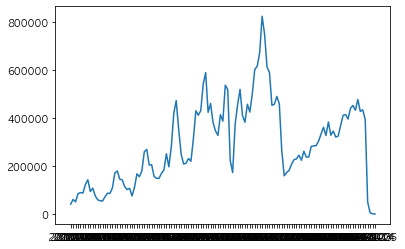

In [114]:
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.show() 

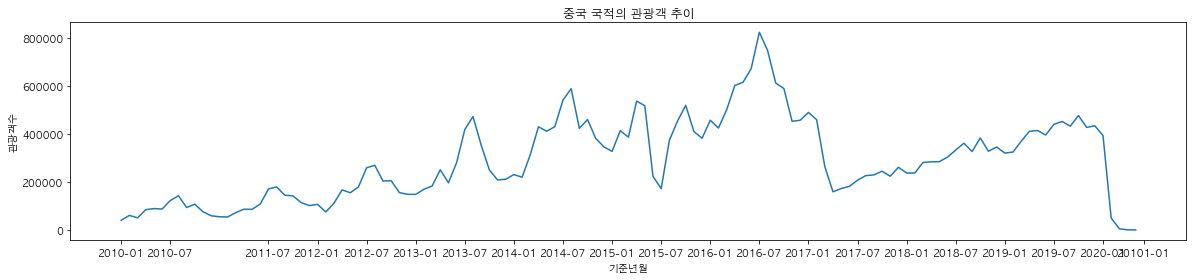

In [116]:
plt.figure(figsize=(20,4))

## 그래프내용 
plt.plot(df_filter["기준년월"],df_filter["관광"])

## 그래프 타이틀, x축, Y축 이름 달기 
plt.title("중국 국적의 관광객 추이") 
plt.xlabel("기준년월") 
plt.ylabel("관광객수") 

## x축 눈금 값 설정

plt.xticks(['2010-01','2010-07','20101-01','2011-07','2012-01','2012-07',\
  '2013-01','2013-07','2014-01','2014-07','2015-01','2015-07',\
  '2016-01','2016-07','2017-01','2017-07','2018-01','2018-07',\
  '2019-01','2019-07','2020-01']) 
plt.show() 


In [120]:
### 상위 5개 국가를 기준으로 그래프 그리기
cntry_list = ['중국','일본','대만','홍콩','미국']  


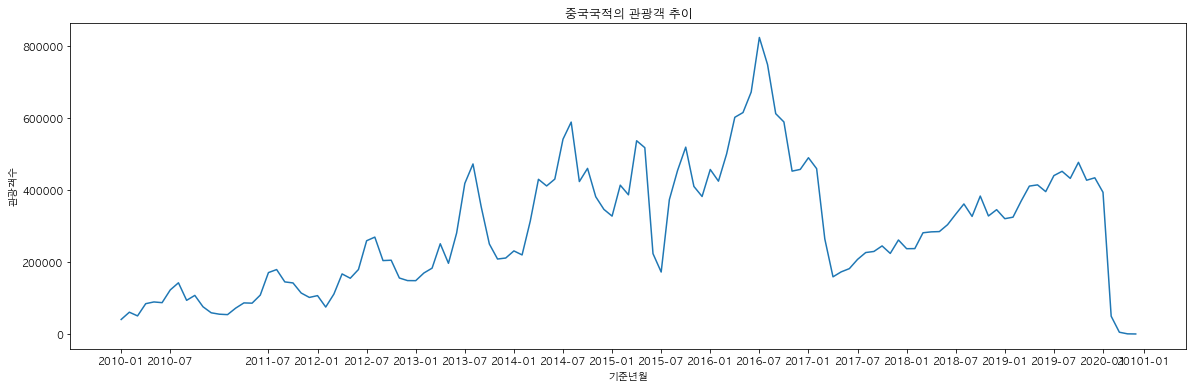

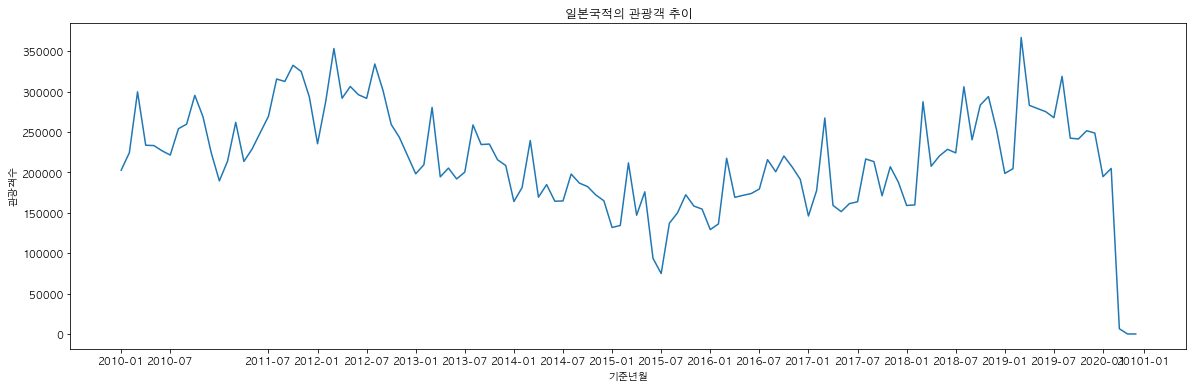

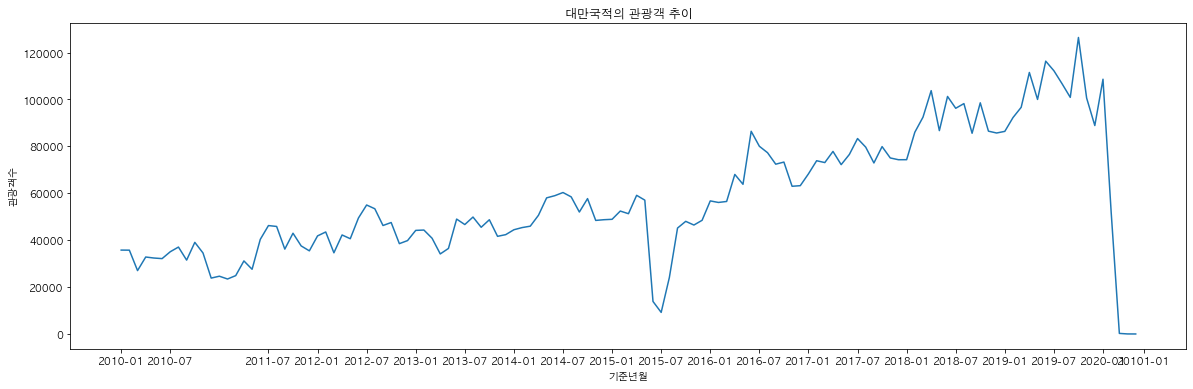

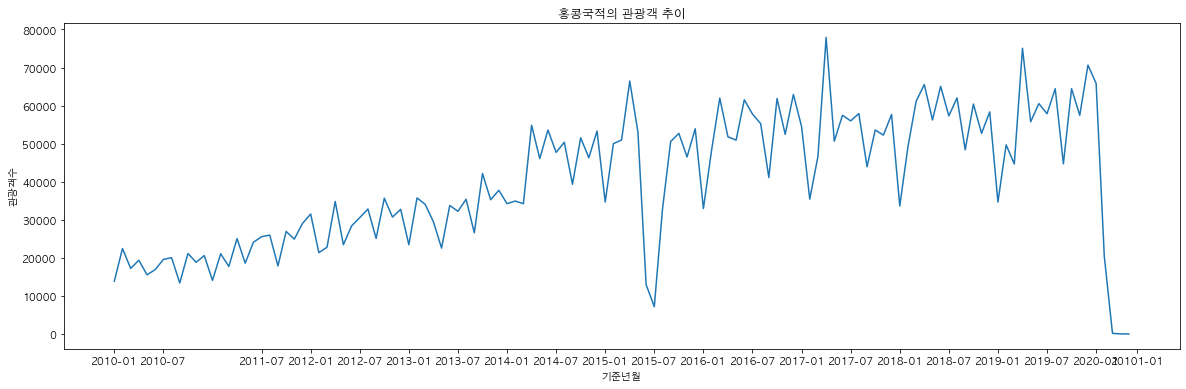

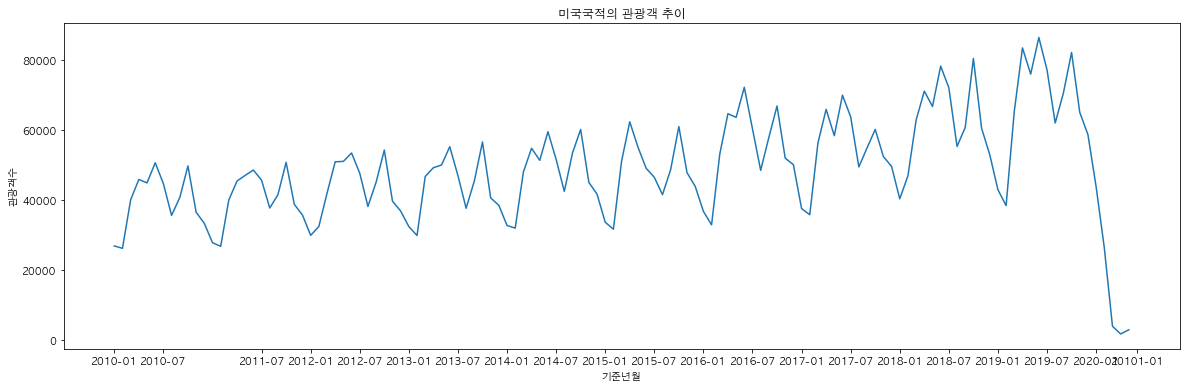

In [121]:
#### 반복문으로 그래프 그리기 
for cntry in cntry_list: 
  ## 국적 관광객만 추출
  condition = (df['국적']== cntry) 
  df_filter = df[condition]

  ## 그래프 그리기 
  plt.figure(figsize=(20,6)) 

  plt.plot(df_filter['기준년월'],df_filter['관광'])

  plt.title("{}국적의 관광객 추이".format(cntry))
  plt.xlabel("기준년월")
  plt.ylabel("관광객수")

  plt.xticks(['2010-01','2010-07','20101-01','2011-07','2012-01','2012-07',\
  '2013-01','2013-07','2014-01','2014-07','2015-01','2015-07',\
  '2016-01','2016-07','2017-01','2017-07','2018-01','2018-07',\
  '2019-01','2019-07','2020-01']) 
  
  plt.show() 


In [125]:
### 히트맵 그래프 그리기

### 히트맵 그래프는 매트릭스 형태의 포함된 각 값을 컬러로 표현하는 시각화 방법
## 히트맵 그래프를 잘 그리러면 x축,y축 그래프 내용이 어떤 변수가 들어가야 할지 고민해야한다.
## x축에는 월(month)을, y축에는 연도(year)를 넣고, 그래프 내용에는 관광객 숫자를 넣습니다.

df.head() 
## str.slice() 함수를 사용하여 연도, 월 컬럼을 만들기
df['년도'] = df["기준년월"].str.slice(0,4)   
df['월'] = df["기준년월"].str.slice(5,7) 
df['월'] 


0       01
1       01
2       01
3       01
4       01
        ..
7495    05
7496    05
7497    05
7498    05
7499    05
Name: 월, Length: 7500, dtype: object

In [128]:
### 중국인 관광객 필터링
condition = (df["국적"]=="중국") 
df_filter = df[condition] 
df_filter.head() 


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [129]:
df_pivot = df_filter.pivot_table(values="관광",
                                index="년도", 
                                columns="월")
df_pivot.head()                                 

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0


In [132]:
### 히트맵은 seaborn 라이브러리를 통해 나타낼수 있음

In [131]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 7.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 39.0 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [133]:
import matplotlib.pyplot as plt  
import seaborn as sns    

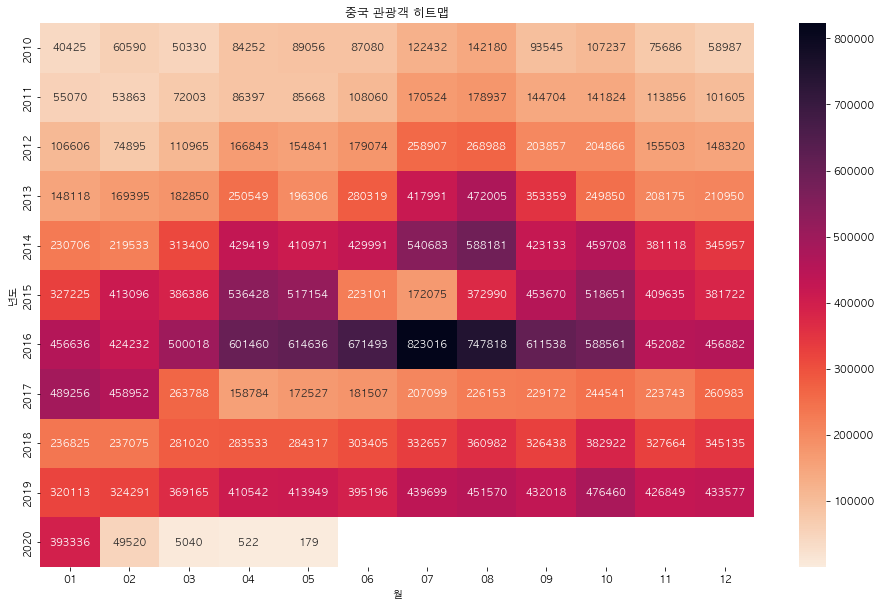

In [134]:
### 그래프 크기 설정
plt.figure(figsize=(16,10))

## 하트맵 그래프 그리기
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap="rocket_r") 

plt.title("중국 관광객 히트맵") 

plt.show()

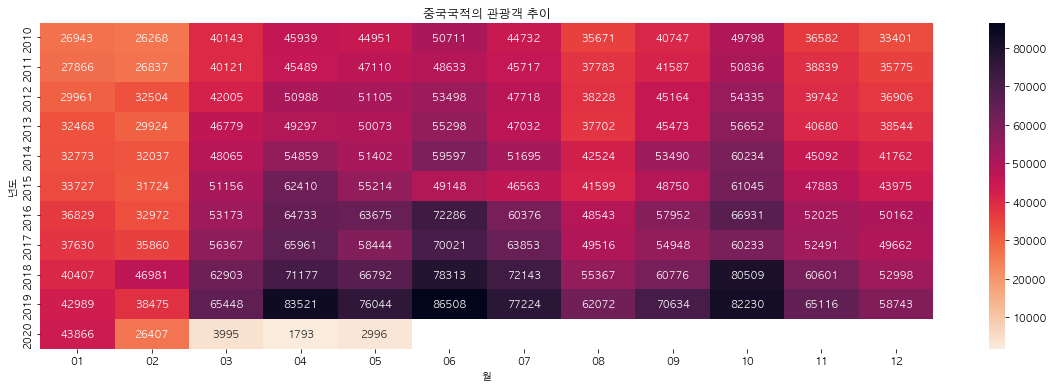

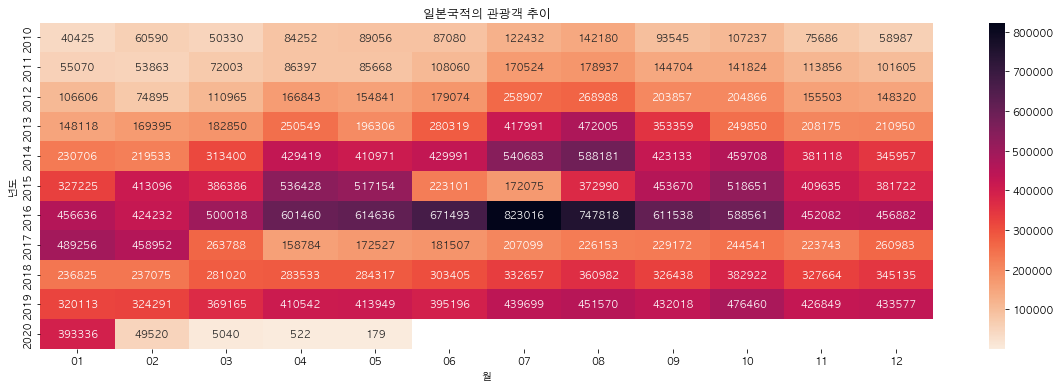

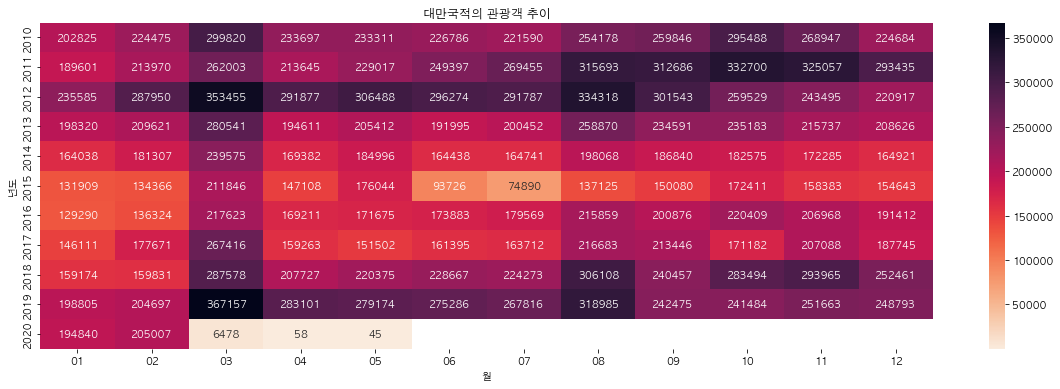

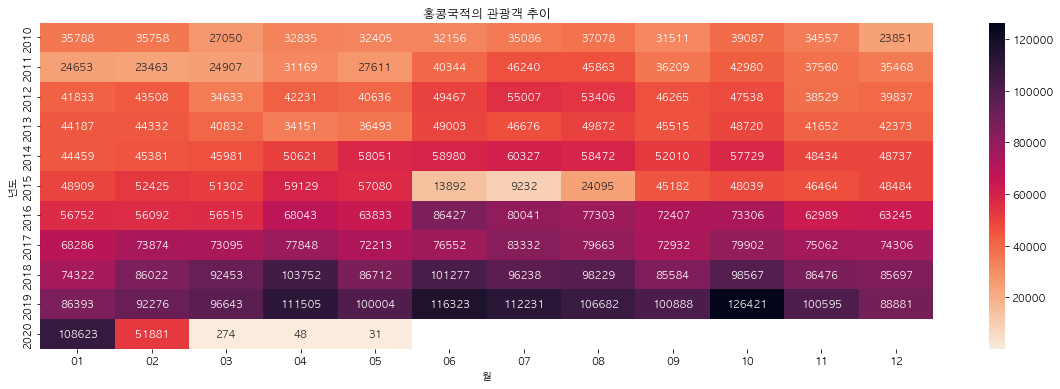

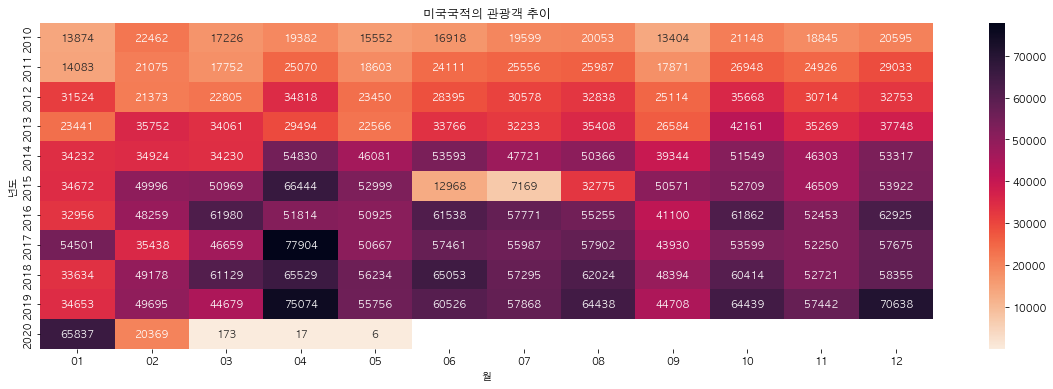

In [140]:
## 반복문을 사용하여 상위 5개국에 대한 히트맵 그래프 그리기 
cntry_list = ['중국','일본','대만','홍콩','미국'] 

for cntry in cntry_list:
  df_pivot = df_filter.pivot_table(values="관광",
                                index="년도", 
                                columns="월")
  condition = (df['국적']== cntry) 
  df_filter = df[condition]

  ## 그래프 그리기 
  plt.figure(figsize=(20,6)) 

  sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap="rocket_r")

  plt.title("{}국적의 관광객 추이".format(cntry))
  
  plt.show() 